In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import seaborn as sns

2023-09-27 12:25:59.291627: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 12:25:59.334219: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-27 12:25:59.336712: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 12:25:59.979292: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os
import glob

#arr = np.loadtxt("ACSST1Y2010.S0102PR-2023-09-10T172542.csv",delimiter=",", dtype=str)
#display(arr)
path = os.getcwd()
csv_files = glob.glob(os.path.join(path + '/fiveyear', "*.csv"))
#csv_files = glob.glob(os.path.join(path + '/testfolder', "*.csv"))
#print(path)
#print(csv_files)

compiled_df = []
for f in csv_files:

    if "-Data" in f:
        # read the csv file
        cols = list(pd.read_csv(f, nrows=1))
        print(cols)

        #df = pd.read_csv(f,  usecols =[i for i in cols if i != "GEO_ID" and i!= "NAME"])
        #df = pd.read_csv(f,  usecols =[i for i in cols if i != "GEO_ID" and i!= "NAME" and "M" not in i and "EA" not in i])
        df = pd.read_csv(f,  usecols =[i for i in cols if i != "GEO_ID" and i!= "NAME" and "M" not in i and "EA" not in i])
        compiled_df.append(df.fillna(0))
        # print the location and filename
        #print('Location:', f)
        #print('File Name:', f.split("\\")[-1])
          
        # print the content
        #print('Content:')
        display(df)
        #print()

#merged_df =  pd.merge(pd.merge(left,right,on='NAME'), dfs)
frame = pd.concat(compiled_df,  axis=1, join='inner')
display(frame)

'''
cols = list(read_csv("oneyear/ACSST1Y2022.S2504-Data.csv", nrows=1))

d = read_csv('oneyear/ACSST1Y2022.S2504-Data.csv',  usecols =[i for i in cols if i != "GEO_ID" and i != "NAME"])
 
df = d.values
print(df)
'''

['GEO_ID', 'NAME', 'S1501_C01_001E', 'S1501_C01_001M', 'S1501_C01_001MA', 'S1501_C01_001EA', 'S1501_C01_002E', 'S1501_C01_002M', 'S1501_C01_002MA', 'S1501_C01_002EA', 'S1501_C01_003E', 'S1501_C01_003EA', 'S1501_C01_003M', 'S1501_C01_003MA', 'S1501_C01_004E', 'S1501_C01_004EA', 'S1501_C01_004M', 'S1501_C01_004MA', 'S1501_C01_005E', 'S1501_C01_005M', 'S1501_C01_005MA', 'S1501_C01_005EA', 'S1501_C01_006E', 'S1501_C01_006EA', 'S1501_C01_006M', 'S1501_C01_006MA', 'S1501_C01_007E', 'S1501_C01_007EA', 'S1501_C01_007M', 'S1501_C01_007MA', 'S1501_C01_008E', 'S1501_C01_008EA', 'S1501_C01_008M', 'S1501_C01_008MA', 'S1501_C01_009E', 'S1501_C01_009EA', 'S1501_C01_009M', 'S1501_C01_009MA', 'S1501_C01_010E', 'S1501_C01_010EA', 'S1501_C01_010M', 'S1501_C01_010MA', 'S1501_C01_011E', 'S1501_C01_011M', 'S1501_C01_011MA', 'S1501_C01_011EA', 'S1501_C01_012E', 'S1501_C01_012EA', 'S1501_C01_012M', 'S1501_C01_012MA', 'S1501_C01_013E', 'S1501_C01_013M', 'S1501_C01_013MA', 'S1501_C01_013EA', 'S1501_C01_014E', '

,S1501_C01_001E,S1501_C01_002E,S1501_C01_003E,S1501_C01_004E,S1501_C01_005E,S1501_C01_006E,S1501_C01_007E,S1501_C01_008E,S1501_C01_009E,S1501_C01_010E,...,S1501_C06_056E,S1501_C06_057E,S1501_C06_058E,S1501_C06_059E,S1501_C06_060E,S1501_C06_061E,S1501_C06_062E,S1501_C06_063E,S1501_C06_064E,Unnamed: 1538
0,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,...,Estimate!!Percent Female!!POVERTY RATE FOR THE...,Estimate!!Percent Female!!POVERTY RATE FOR THE...,Estimate!!Percent Female!!POVERTY RATE FOR THE...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,NaN
1,1611,212,427,828,144,13018,3233,1307,3881,1157,...,75.5,65.0,39.2,(X),(X),(X),(X),(X),(X),NaN
2,3388,255,834,1823,476,28428,6721,2815,7340,2198,...,52.5,40.6,26.6,(X),(X),(X),(X),(X),(X),NaN
3,5202,548,1744,2456,454,40042,6046,3912,11862,5137,...,63.1,48.6,22.9,(X),(X),(X),(X),(X),(X),NaN
4,2345,84,661,1421,179,17784,2848,1762,6034,1895,...,47.2,38.3,19.7,(X),(X),(X),(X),(X),(X),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,4972,406,1506,2601,459,39632,6041,3425,11932,4583,...,52.3,41.6,17.4,(X),(X),(X),(X),(X),(X),NaN
75,790,65,638,87,0,5970,887,726,2872,95,...,46.5,81.9,7.2,(X),(X),(X),(X),(X),(X),NaN
76,2288,128,668,1117,375,15523,2462,867,5469,1628,...,53.8,44.6,18.7,(X),(X),(X),(X),(X),(X),NaN
77,2843,178,499,1863,303,22690,3667,2430,6011,3947,...,57.6,51.0,23.6,(X),(X),(X),(X),(X),(X),NaN


['GEO_ID', 'NAME', 'S2502_C01_001E', 'S2502_C01_001M', 'S2502_C01_001MA', 'S2502_C01_001EA', 'S2502_C01_002E', 'S2502_C01_002M', 'S2502_C01_002MA', 'S2502_C01_002EA', 'S2502_C01_003E', 'S2502_C01_003EA', 'S2502_C01_003M', 'S2502_C01_003MA', 'S2502_C01_004E', 'S2502_C01_004M', 'S2502_C01_004MA', 'S2502_C01_004EA', 'S2502_C01_005E', 'S2502_C01_005M', 'S2502_C01_005MA', 'S2502_C01_005EA', 'S2502_C01_006E', 'S2502_C01_006EA', 'S2502_C01_006M', 'S2502_C01_006MA', 'S2502_C01_007E', 'S2502_C01_007M', 'S2502_C01_007MA', 'S2502_C01_007EA', 'S2502_C01_008E', 'S2502_C01_008EA', 'S2502_C01_008M', 'S2502_C01_008MA', 'S2502_C01_009E', 'S2502_C01_009M', 'S2502_C01_009MA', 'S2502_C01_009EA', 'S2502_C01_010E', 'S2502_C01_010M', 'S2502_C01_010MA', 'S2502_C01_010EA', 'S2502_C01_011E', 'S2502_C01_011M', 'S2502_C01_011MA', 'S2502_C01_011EA', 'S2502_C01_012E', 'S2502_C01_012M', 'S2502_C01_012MA', 'S2502_C01_012EA', 'S2502_C01_013E', 'S2502_C01_013EA', 'S2502_C01_013M', 'S2502_C01_013MA', 'S2502_C01_014E', '

,S2502_C01_001E,S2502_C01_002E,S2502_C01_003E,S2502_C01_004E,S2502_C01_005E,S2502_C01_006E,S2502_C01_007E,S2502_C01_008E,S2502_C01_009E,S2502_C01_010E,...,S2502_C06_019E,S2502_C06_020E,S2502_C06_021E,S2502_C06_022E,S2502_C06_023E,S2502_C06_024E,S2502_C06_025E,S2502_C06_026E,S2502_C06_027E,Unnamed: 650
0,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,NaN
1,5611,4832,36,4,0,0,500,239,5578,33,...,31.2,21.9,18.3,8.2,36.1,14.3,13.2,9.5,18.8,NaN
2,12995,7807,222,12,0,0,501,4453,12522,397,...,27.1,26.4,17.4,8.2,31.3,16.6,14.9,9.0,20.0,NaN
3,21442,15721,964,26,19,0,2939,1773,21113,293,...,34.3,19.8,15.4,11.6,30.8,18.7,12.8,9.6,16.5,NaN
4,8917,3841,559,69,0,0,1084,3364,8917,0,...,42.2,20.9,12.6,12.5,27.2,8.7,16.7,12.8,22.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,19799,10791,844,10,0,0,3249,4905,19640,128,...,35.4,23.5,20.0,14.0,41.5,17.5,9.2,5.5,12.2,NaN
75,2374,756,163,0,14,0,1249,192,2193,113,...,48.2,15.9,21.7,2.6,18.0,30.3,29.0,11.8,8.4,NaN
76,7823,3499,626,0,0,0,909,2789,7809,0,...,42.6,21.5,17.3,10.7,34.9,10.4,20.6,4.6,18.7,NaN
77,11905,1276,6050,0,0,0,4239,340,11878,27,...,24.0,34.4,11.2,17.4,27.5,15.9,19.5,7.0,12.8,NaN


['GEO_ID', 'NAME', 'S0101_C01_001E', 'S0101_C01_001M', 'S0101_C01_001MA', 'S0101_C01_001EA', 'S0101_C01_002E', 'S0101_C01_002M', 'S0101_C01_002MA', 'S0101_C01_002EA', 'S0101_C01_003E', 'S0101_C01_003M', 'S0101_C01_003MA', 'S0101_C01_003EA', 'S0101_C01_004E', 'S0101_C01_004M', 'S0101_C01_004MA', 'S0101_C01_004EA', 'S0101_C01_005E', 'S0101_C01_005M', 'S0101_C01_005MA', 'S0101_C01_005EA', 'S0101_C01_006E', 'S0101_C01_006EA', 'S0101_C01_006M', 'S0101_C01_006MA', 'S0101_C01_007E', 'S0101_C01_007M', 'S0101_C01_007MA', 'S0101_C01_007EA', 'S0101_C01_008E', 'S0101_C01_008M', 'S0101_C01_008MA', 'S0101_C01_008EA', 'S0101_C01_009E', 'S0101_C01_009M', 'S0101_C01_009MA', 'S0101_C01_009EA', 'S0101_C01_010E', 'S0101_C01_010M', 'S0101_C01_010MA', 'S0101_C01_010EA', 'S0101_C01_011E', 'S0101_C01_011M', 'S0101_C01_011MA', 'S0101_C01_011EA', 'S0101_C01_012E', 'S0101_C01_012M', 'S0101_C01_012MA', 'S0101_C01_012EA', 'S0101_C01_013E', 'S0101_C01_013M', 'S0101_C01_013MA', 'S0101_C01_013EA', 'S0101_C01_014E', '

,S0101_C01_001E,S0101_C01_002E,S0101_C01_003E,S0101_C01_004E,S0101_C01_005E,S0101_C01_006E,S0101_C01_007E,S0101_C01_008E,S0101_C01_009E,S0101_C01_010E,...,S0101_C06_030E,S0101_C06_031E,S0101_C06_032E,S0101_C06_033E,S0101_C06_034E,S0101_C06_035E,S0101_C06_036E,S0101_C06_037E,S0101_C06_038E,Unnamed: 914
0,Estimate!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under ...,Estimate!!Total!!Total population!!AGE!!5 to 9...,Estimate!!Total!!Total population!!AGE!!10 to ...,Estimate!!Total!!Total population!!AGE!!15 to ...,Estimate!!Total!!Total population!!AGE!!20 to ...,Estimate!!Total!!Total population!!AGE!!25 to ...,Estimate!!Total!!Total population!!AGE!!30 to ...,Estimate!!Total!!Total population!!AGE!!35 to ...,Estimate!!Total!!Total population!!AGE!!40 to ...,...,Estimate!!Percent Female!!Total population!!SE...,Estimate!!Percent Female!!Total population!!SE...,Estimate!!Percent Female!!Total population!!SU...,Estimate!!Percent Female!!Total population!!SU...,Estimate!!Percent Female!!Total population!!SU...,Estimate!!Percent Female!!Total population!!SU...,Estimate!!Percent Female!!Total population!!SU...,Estimate!!Percent Female!!Total population!!PE...,Estimate!!Percent Female!!Total population!!PE...,NaN
1,18068,643,916,1209,1134,1148,1155,1016,917,1287,...,21.2,9.4,(X),(X),(X),(X),(X),(X),(X),NaN
2,38307,1267,1671,2196,2273,2472,2515,2275,1990,2708,...,21.1,8.9,(X),(X),(X),(X),(X),(X),(X),NaN
3,55241,2007,2311,3533,3638,3710,3568,3110,3213,3460,...,23.5,10.6,(X),(X),(X),(X),(X),(X),(X),NaN
4,24567,847,1022,1609,1620,1685,1635,1441,1253,1856,...,22.1,10.3,(X),(X),(X),(X),(X),(X),(X),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,54544,2192,2611,3113,3440,3556,3762,3253,3227,3431,...,22.4,10.7,(X),(X),(X),(X),(X),(X),(X),NaN
75,8317,401,391,379,590,586,265,461,669,512,...,24.3,11.5,(X),(X),(X),(X),(X),(X),(X),NaN
76,22341,1002,1363,1271,1549,1633,1486,1234,1074,1410,...,19.8,8.1,(X),(X),(X),(X),(X),(X),(X),NaN
77,31047,1092,1457,1816,1950,2042,1982,1675,1520,2031,...,22.9,10.2,(X),(X),(X),(X),(X),(X),(X),NaN


['GEO_ID', 'NAME', 'S1101_C01_001E', 'S1101_C01_001EA', 'S1101_C01_001M', 'S1101_C01_001MA', 'S1101_C01_002E', 'S1101_C01_002M', 'S1101_C01_002MA', 'S1101_C01_002EA', 'S1101_C01_003E', 'S1101_C01_003M', 'S1101_C01_003MA', 'S1101_C01_003EA', 'S1101_C01_004E', 'S1101_C01_004M', 'S1101_C01_004MA', 'S1101_C01_004EA', 'S1101_C01_005E', 'S1101_C01_005EA', 'S1101_C01_005M', 'S1101_C01_005MA', 'S1101_C01_006E', 'S1101_C01_006M', 'S1101_C01_006MA', 'S1101_C01_006EA', 'S1101_C01_007E', 'S1101_C01_007EA', 'S1101_C01_007M', 'S1101_C01_007MA', 'S1101_C01_008E', 'S1101_C01_008M', 'S1101_C01_008MA', 'S1101_C01_008EA', 'S1101_C01_009E', 'S1101_C01_009M', 'S1101_C01_009MA', 'S1101_C01_009EA', 'S1101_C01_010E', 'S1101_C01_010M', 'S1101_C01_010MA', 'S1101_C01_010EA', 'S1101_C01_011E', 'S1101_C01_011EA', 'S1101_C01_011M', 'S1101_C01_011MA', 'S1101_C01_012E', 'S1101_C01_012EA', 'S1101_C01_012M', 'S1101_C01_012MA', 'S1101_C01_013E', 'S1101_C01_013M', 'S1101_C01_013MA', 'S1101_C01_013EA', 'S1101_C01_014E', '

,S1101_C01_001E,S1101_C01_002E,S1101_C01_003E,S1101_C01_004E,S1101_C01_005E,S1101_C01_006E,S1101_C01_007E,S1101_C01_008E,S1101_C01_009E,S1101_C01_010E,...,S1101_C05_011E,S1101_C05_012E,S1101_C05_013E,S1101_C05_014E,S1101_C05_015E,S1101_C05_016E,S1101_C05_017E,S1101_C05_018E,S1101_C05_019E,Unnamed: 382
0,Estimate!!Total!!HOUSEHOLDS!!Total households,Estimate!!Total!!HOUSEHOLDS!!Average household...,Estimate!!Total!!FAMILIES!!Total families,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Househol...,Estimate!!Total!!AGE OF OWN CHILDREN!!Househol...,Estimate!!Total!!AGE OF OWN CHILDREN!!Househol...,Estimate!!Total!!AGE OF OWN CHILDREN!!Househol...,Estimate!!Total!!Total households,Estimate!!Total!!Total households!!SELECTED HO...,...,Estimate!!Nonfamily household!!Total household...,Estimate!!Nonfamily household!!Total household...,Estimate!!Nonfamily household!!Total household...,Estimate!!Nonfamily household!!Total household...,Estimate!!Nonfamily household!!Total household...,Estimate!!Nonfamily household!!Total household...,Estimate!!Nonfamily household!!Total household...,Estimate!!Nonfamily household!!Total household...,Estimate!!Nonfamily household!!Total household...,NaN
1,5611,3.21,3756,4.11,1198,18.0,4.9,77.0,5611,25.2,...,65.2,45.3,85.3,38.4,93.7,6.3,0.0,64.6,35.4,NaN
2,12995,2.94,9040,3.61,2583,18.0,10.0,71.9,12995,24.0,...,61.0,51.5,80.9,45.0,78.3,21.7,0.0,68.2,31.8,NaN
3,21442,2.53,14353,3.12,4816,15.6,15.0,69.4,21442,26.2,...,60.1,50.8,86.6,46.4,79.3,20.4,0.3,48.3,51.7,NaN
4,8917,2.74,6573,3.17,2129,16.2,7.9,76.0,8917,27.7,...,51.9,39.5,89.0,37.4,63.9,36.1,0.0,46.2,53.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,19799,2.74,13226,3.37,4267,15.5,10.8,73.7,19799,26.1,...,61.9,48.6,87.1,43.7,92.3,7.1,0.6,73.8,26.2,NaN
75,2374,3.50,1394,4.82,321,20.9,20.2,58.9,2374,18.7,...,60.1,47.0,84.0,43.8,91.6,8.4,0.0,69.0,31.0,NaN
76,7823,2.84,5769,3.31,1948,17.5,12.4,70.1,7823,33.7,...,66.2,47.8,82.1,41.0,94.5,5.5,0.0,65.5,34.5,NaN
77,11905,2.60,7917,3.21,2459,13.7,14.4,71.9,11905,26.4,...,62.7,43.3,83.2,37.3,94.9,4.9,0.2,61.9,38.1,NaN


['GEO_ID', 'NAME', 'S2504_C01_001E', 'S2504_C01_001EA', 'S2504_C01_001M', 'S2504_C01_001MA', 'S2504_C01_002E', 'S2504_C01_002EA', 'S2504_C01_002M', 'S2504_C01_002MA', 'S2504_C01_003E', 'S2504_C01_003EA', 'S2504_C01_003M', 'S2504_C01_003MA', 'S2504_C01_004E', 'S2504_C01_004M', 'S2504_C01_004MA', 'S2504_C01_004EA', 'S2504_C01_005E', 'S2504_C01_005M', 'S2504_C01_005MA', 'S2504_C01_005EA', 'S2504_C01_006E', 'S2504_C01_006M', 'S2504_C01_006MA', 'S2504_C01_006EA', 'S2504_C01_007E', 'S2504_C01_007M', 'S2504_C01_007MA', 'S2504_C01_007EA', 'S2504_C01_008E', 'S2504_C01_008EA', 'S2504_C01_008M', 'S2504_C01_008MA', 'S2504_C01_009E', 'S2504_C01_009EA', 'S2504_C01_009M', 'S2504_C01_009MA', 'S2504_C01_010E', 'S2504_C01_010EA', 'S2504_C01_010M', 'S2504_C01_010MA', 'S2504_C01_011E', 'S2504_C01_011M', 'S2504_C01_011MA', 'S2504_C01_011EA', 'S2504_C01_012E', 'S2504_C01_012M', 'S2504_C01_012MA', 'S2504_C01_012EA', 'S2504_C01_013E', 'S2504_C01_013M', 'S2504_C01_013MA', 'S2504_C01_013EA', 'S2504_C01_014E', '

,S2504_C01_001E,S2504_C01_002E,S2504_C01_003E,S2504_C01_004E,S2504_C01_005E,S2504_C01_006E,S2504_C01_007E,S2504_C01_008E,S2504_C01_009E,S2504_C01_010E,...,S2504_C06_030E,S2504_C06_031E,S2504_C06_032E,S2504_C06_033E,S2504_C06_034E,S2504_C06_035E,S2504_C06_036E,S2504_C06_037E,S2504_C06_038E,Unnamed: 914
0,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,NaN
1,5611,4513,673,60,87,126,152,0,0,156,...,10.1,94.9,0.0,0.3,5.9,0.0,0.0,1.2,92.6,NaN
2,12995,9702,476,2095,463,165,94,0,0,228,...,2.9,90.3,0.0,0.3,2.2,0.0,0.0,0.0,97.5,NaN
3,21442,15044,2814,255,324,555,2423,27,0,552,...,7.4,96.7,0.0,0.1,3.9,0.1,0.0,0.1,95.8,NaN
4,8917,5922,427,2014,352,0,166,36,0,242,...,4.6,95.5,0.0,0.5,3.7,0.0,0.0,0.0,95.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,19799,15875,2686,52,386,434,221,145,0,83,...,7.5,96.6,0.4,1.1,5.3,0.0,0.0,0.0,93.3,NaN
75,2374,1930,269,0,89,19,67,0,0,87,...,11.6,97.9,0.0,0.0,5.1,0.0,0.0,0.0,94.9,NaN
76,7823,6226,1130,0,63,88,290,26,0,139,...,11.6,98.2,0.0,1.5,3.3,0.0,0.0,0.0,95.2,NaN
77,11905,10392,1098,105,40,174,87,9,0,292,...,11.1,94.7,0.0,0.0,4.2,0.0,0.0,0.0,95.8,NaN


['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001EA', 'DP05_0001M', 'DP05_0001MA', 'DP05_0002E', 'DP05_0002M', 'DP05_0002MA', 'DP05_0002EA', 'DP05_0003E', 'DP05_0003M', 'DP05_0003MA', 'DP05_0003EA', 'DP05_0004E', 'DP05_0004M', 'DP05_0004MA', 'DP05_0004EA', 'DP05_0005E', 'DP05_0005M', 'DP05_0005MA', 'DP05_0005EA', 'DP05_0006E', 'DP05_0006M', 'DP05_0006MA', 'DP05_0006EA', 'DP05_0007E', 'DP05_0007M', 'DP05_0007MA', 'DP05_0007EA', 'DP05_0008E', 'DP05_0008EA', 'DP05_0008M', 'DP05_0008MA', 'DP05_0009E', 'DP05_0009M', 'DP05_0009MA', 'DP05_0009EA', 'DP05_0010E', 'DP05_0010M', 'DP05_0010MA', 'DP05_0010EA', 'DP05_0011E', 'DP05_0011M', 'DP05_0011MA', 'DP05_0011EA', 'DP05_0012E', 'DP05_0012EA', 'DP05_0012M', 'DP05_0012MA', 'DP05_0013E', 'DP05_0013M', 'DP05_0013MA', 'DP05_0013EA', 'DP05_0014E', 'DP05_0014M', 'DP05_0014MA', 'DP05_0014EA', 'DP05_0015E', 'DP05_0015M', 'DP05_0015MA', 'DP05_0015EA', 'DP05_0016E', 'DP05_0016M', 'DP05_0016MA', 'DP05_0016EA', 'DP05_0017E', 'DP05_0017M', 'DP05_0017MA', 'DP05_0017

,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0004E,DP05_0005E,DP05_0006E,DP05_0007E,DP05_0008E,DP05_0009E,DP05_0010E,...,DP05_0081PE,DP05_0082PE,DP05_0083PE,DP05_0084PE,DP05_0085PE,DP05_0086PE,DP05_0087PE,DP05_0088PE,DP05_0089PE,Unnamed: 714
0,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex r...,Estimate!!SEX AND AGE!!Total population!!Under...,Estimate!!SEX AND AGE!!Total population!!5 to ...,Estimate!!SEX AND AGE!!Total population!!10 to...,Estimate!!SEX AND AGE!!Total population!!15 to...,Estimate!!SEX AND AGE!!Total population!!20 to...,Estimate!!SEX AND AGE!!Total population!!25 to...,...,Percent!!HISPANIC OR LATINO AND RACE!!Total po...,Percent!!HISPANIC OR LATINO AND RACE!!Total po...,Percent!!HISPANIC OR LATINO AND RACE!!Total po...,Percent!!HISPANIC OR LATINO AND RACE!!Total po...,Percent!!HISPANIC OR LATINO AND RACE!!Total po...,Percent!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...",NaN
1,18068,8810,9258,95.2,643,916,1209,1134,1148,2171,...,0.0,0.0,0.0,0.0,0.0,(X),14603,48.3,51.7,NaN
2,38307,18726,19581,95.6,1267,1671,2196,2273,2472,4790,...,0.0,0.2,0.9,0.0,0.9,(X),31684,48.8,51.2,NaN
3,55241,26751,28490,93.9,2007,2311,3533,3638,3710,6678,...,0.0,0.2,0.3,0.1,0.2,(X),44856,47.7,52.3,NaN
4,24567,12006,12561,95.6,847,1022,1609,1620,1685,3076,...,0.0,0.0,0.2,0.2,0.0,(X),20048,47.6,52.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,54544,26057,28487,91.5,2192,2611,3113,3440,3556,7015,...,0.0,0.2,0.0,0.0,0.0,(X),44370,46.9,53.1,NaN
75,8317,4239,4078,103.9,401,391,379,590,586,726,...,0.0,0.0,1.2,1.2,0.0,(X),6734,50.2,49.8,NaN
76,22341,10796,11545,93.5,1002,1363,1271,1549,1633,2720,...,0.0,0.0,0.0,0.0,0.0,(X),17807,47.5,52.5,NaN
77,31047,15000,16047,93.5,1092,1457,1816,1950,2042,3657,...,0.0,0.0,0.0,0.0,0.0,(X),25441,47.5,52.5,NaN


['GEO_ID', 'NAME', 'S1902_C01_001E', 'S1902_C01_001EA', 'S1902_C01_001M', 'S1902_C01_001MA', 'S1902_C01_002E', 'S1902_C01_002M', 'S1902_C01_002MA', 'S1902_C01_002EA', 'S1902_C01_003E', 'S1902_C01_003M', 'S1902_C01_003MA', 'S1902_C01_003EA', 'S1902_C01_004E', 'S1902_C01_004EA', 'S1902_C01_004M', 'S1902_C01_004MA', 'S1902_C01_005E', 'S1902_C01_005M', 'S1902_C01_005MA', 'S1902_C01_005EA', 'S1902_C01_006E', 'S1902_C01_006M', 'S1902_C01_006MA', 'S1902_C01_006EA', 'S1902_C01_007E', 'S1902_C01_007M', 'S1902_C01_007MA', 'S1902_C01_007EA', 'S1902_C01_008E', 'S1902_C01_008EA', 'S1902_C01_008M', 'S1902_C01_008MA', 'S1902_C01_009E', 'S1902_C01_009EA', 'S1902_C01_009M', 'S1902_C01_009MA', 'S1902_C01_010E', 'S1902_C01_010M', 'S1902_C01_010MA', 'S1902_C01_010EA', 'S1902_C01_011E', 'S1902_C01_011EA', 'S1902_C01_011M', 'S1902_C01_011MA', 'S1902_C01_012E', 'S1902_C01_012EA', 'S1902_C01_012M', 'S1902_C01_012MA', 'S1902_C01_013E', 'S1902_C01_013M', 'S1902_C01_013MA', 'S1902_C01_013EA', 'S1902_C01_014E', '

,S1902_C01_001E,S1902_C01_002E,S1902_C01_003E,S1902_C01_004E,S1902_C01_005E,S1902_C01_006E,S1902_C01_007E,S1902_C01_008E,S1902_C01_009E,S1902_C01_010E,...,S1902_C03_020E,S1902_C03_021E,S1902_C03_022E,S1902_C03_023E,S1902_C03_024E,S1902_C03_025E,S1902_C03_026E,S1902_C03_027E,S1902_C03_028E,Unnamed: 338
0,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,NaN
1,5611,2790,2273,800,67,2527,0,3399,2703,772,...,7764,8897,N,-,-,5567,6384,7508,11334,NaN
2,12995,6618,5678,1607,3448,6839,32,7135,761,2039,...,10515,9901,N,N,-,9464,11213,10549,14032,NaN
3,21442,10042,9334,1316,675,10000,36,10191,859,3596,...,12062,11967,15717,95879,-,11794,11724,11790,28381,NaN
4,8917,5292,4723,1127,194,4102,35,4645,312,1392,...,12309,9665,8074,-,-,13026,14578,13133,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,19799,10643,9951,1115,486,9794,42,8262,1219,2725,...,11985,13448,18228,N,-,10552,14274,12402,10237,NaN
75,2374,1146,804,377,19,1217,13,1028,62,443,...,9818,11027,-,N,-,7085,22604,7758,19505,NaN
76,7823,4457,4234,500,191,3843,14,4670,243,1280,...,12104,12696,-,-,-,11561,12351,12164,15335,NaN
77,11905,5428,5009,908,116,6560,28,7262,689,2128,...,11159,10721,-,N,-,9953,11203,10499,N,NaN


['GEO_ID', 'NAME', 'S2503_C01_001E', 'S2503_C01_001M', 'S2503_C01_001MA', 'S2503_C01_001EA', 'S2503_C01_002E', 'S2503_C01_002M', 'S2503_C01_002MA', 'S2503_C01_002EA', 'S2503_C01_003E', 'S2503_C01_003EA', 'S2503_C01_003M', 'S2503_C01_003MA', 'S2503_C01_004E', 'S2503_C01_004M', 'S2503_C01_004MA', 'S2503_C01_004EA', 'S2503_C01_005E', 'S2503_C01_005EA', 'S2503_C01_005M', 'S2503_C01_005MA', 'S2503_C01_006E', 'S2503_C01_006EA', 'S2503_C01_006M', 'S2503_C01_006MA', 'S2503_C01_007E', 'S2503_C01_007EA', 'S2503_C01_007M', 'S2503_C01_007MA', 'S2503_C01_008E', 'S2503_C01_008EA', 'S2503_C01_008M', 'S2503_C01_008MA', 'S2503_C01_009E', 'S2503_C01_009EA', 'S2503_C01_009M', 'S2503_C01_009MA', 'S2503_C01_010E', 'S2503_C01_010M', 'S2503_C01_010MA', 'S2503_C01_010EA', 'S2503_C01_011E', 'S2503_C01_011M', 'S2503_C01_011MA', 'S2503_C01_011EA', 'S2503_C01_012E', 'S2503_C01_012EA', 'S2503_C01_012M', 'S2503_C01_012MA', 'S2503_C01_013E', 'S2503_C01_013M', 'S2503_C01_013MA', 'S2503_C01_013EA', 'S2503_C01_014E', '

,S2503_C01_001E,S2503_C01_002E,S2503_C01_003E,S2503_C01_004E,S2503_C01_005E,S2503_C01_006E,S2503_C01_007E,S2503_C01_008E,S2503_C01_009E,S2503_C01_010E,...,S2503_C06_038E,S2503_C06_039E,S2503_C06_040E,S2503_C06_041E,S2503_C06_042E,S2503_C06_043E,S2503_C06_044E,S2503_C06_045E,S2503_C06_046E,Unnamed: 1106
0,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,Estimate!!Percent renter-occupied housing unit...,NaN
1,5611,882,956,891,843,512,721,530,191,36,...,2.5,0.0,0.0,0.0,0.0,0.0,0.0,2.2,40.1,NaN
2,12995,1688,1796,1678,1671,989,1845,1465,1049,427,...,0.6,0.0,0.0,0.7,0.7,0.0,0.0,2.1,57.9,NaN
3,21442,4078,2509,3011,2395,1419,2208,1907,2206,913,...,3.1,0.5,0.3,1.9,1.7,0.2,0.0,5.0,56.7,NaN
4,8917,1223,761,984,1143,834,1280,1050,1079,256,...,1.3,1.4,0.0,0.0,0.0,0.0,0.0,3.2,59.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,19799,2715,1916,2569,2087,1759,2215,2842,1886,1072,...,2.2,1.5,0.0,3.6,3.6,0.0,0.0,4.8,45.3,NaN
75,2374,343,311,541,272,165,327,273,68,53,...,2.7,0.0,0.0,3.0,3.0,0.0,0.0,0.0,42.6,NaN
76,7823,960,996,1045,799,636,1121,965,679,198,...,2.3,0.0,0.0,0.4,0.4,0.0,0.0,1.2,54.9,NaN
77,11905,1928,1556,1674,1287,835,1913,1162,1120,262,...,2.6,0.2,0.0,0.6,0.6,0.0,0.0,3.6,50.6,NaN


['GEO_ID', 'NAME', 'S0701PR_C01_001E', 'S0701PR_C01_001EA', 'S0701PR_C01_001M', 'S0701PR_C01_001MA', 'S0701PR_C01_002E', 'S0701PR_C01_002EA', 'S0701PR_C01_002M', 'S0701PR_C01_002MA', 'S0701PR_C01_003E', 'S0701PR_C01_003M', 'S0701PR_C01_003MA', 'S0701PR_C01_003EA', 'S0701PR_C01_004E', 'S0701PR_C01_004EA', 'S0701PR_C01_004M', 'S0701PR_C01_004MA', 'S0701PR_C01_005E', 'S0701PR_C01_005M', 'S0701PR_C01_005MA', 'S0701PR_C01_005EA', 'S0701PR_C01_006E', 'S0701PR_C01_006EA', 'S0701PR_C01_006M', 'S0701PR_C01_006MA', 'S0701PR_C01_007E', 'S0701PR_C01_007EA', 'S0701PR_C01_007M', 'S0701PR_C01_007MA', 'S0701PR_C01_008E', 'S0701PR_C01_008EA', 'S0701PR_C01_008M', 'S0701PR_C01_008MA', 'S0701PR_C01_009E', 'S0701PR_C01_009EA', 'S0701PR_C01_009M', 'S0701PR_C01_009MA', 'S0701PR_C01_010E', 'S0701PR_C01_010EA', 'S0701PR_C01_010M', 'S0701PR_C01_010MA', 'S0701PR_C01_011E', 'S0701PR_C01_011M', 'S0701PR_C01_011MA', 'S0701PR_C01_011EA', 'S0701PR_C01_012E', 'S0701PR_C01_012M', 'S0701PR_C01_012MA', 'S0701PR_C01_012EA

,S0701PR_C01_001E,S0701PR_C01_002E,S0701PR_C01_003E,S0701PR_C01_004E,S0701PR_C01_005E,S0701PR_C01_006E,S0701PR_C01_007E,S0701PR_C01_008E,S0701PR_C01_009E,S0701PR_C01_010E,...,S0701PR_C05_048E,S0701PR_C05_049E,S0701PR_C05_050E,S0701PR_C05_051E,S0701PR_C05_052E,S0701PR_C05_053E,S0701PR_C05_054E,S0701PR_C05_055E,S0701PR_C05_056E,Unnamed: 1122
0,Estimate!!Total!!Population 1 year and over,Estimate!!Total!!Population 1 year and over!!A...,Estimate!!Total!!Population 1 year and over!!A...,Estimate!!Total!!Population 1 year and over!!A...,Estimate!!Total!!Population 1 year and over!!A...,Estimate!!Total!!Population 1 year and over!!A...,Estimate!!Total!!Population 1 year and over!!A...,Estimate!!Total!!Population 1 year and over!!A...,Estimate!!Total!!Population 1 year and over!!A...,Estimate!!Total!!Population 1 year and over!!A...,...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,NaN
1,17918,493,2796,1611,2171,2204,2350,2577,2113,1603,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(X),NaN
2,38031,991,5224,3388,4790,4698,5184,5960,4633,3163,...,-,0.1,0.1,0.0,0.1,0.1,0.0,0.2,(X),NaN
3,54966,1732,7990,5202,6678,6673,7010,7358,6863,5460,...,5244,0.4,0.7,0.1,0.0,0.4,0.0,0.9,(X),NaN
4,24477,757,3591,2345,3076,3109,3179,3369,2757,2294,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(X),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,54312,1960,7748,4972,7015,6658,7107,7389,6138,5325,...,-,0.0,0.1,0.0,0.0,0.0,0.0,0.1,(X),NaN
75,8268,352,1156,790,726,1181,866,1293,1050,854,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(X),NaN
76,22015,676,3528,2288,2720,2484,2890,3241,2573,1615,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(X),NaN
77,30837,882,4422,2843,3657,3551,4142,4539,3898,2903,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(X),NaN


,S1501_C01_001E,S1501_C01_002E,S1501_C01_003E,S1501_C01_004E,S1501_C01_005E,S1501_C01_006E,S1501_C01_007E,S1501_C01_008E,S1501_C01_009E,S1501_C01_010E,...,S0701PR_C05_048E,S0701PR_C05_049E,S0701PR_C05_050E,S0701PR_C05_051E,S0701PR_C05_052E,S0701PR_C05_053E,S0701PR_C05_054E,S0701PR_C05_055E,S0701PR_C05_056E,Unnamed: 1122
0,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,Estimate!!Moved; from outside Puerto Rico and ...,0.0
1,1611,212,427,828,144,13018,3233,1307,3881,1157,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(X),0.0
2,3388,255,834,1823,476,28428,6721,2815,7340,2198,...,-,0.1,0.1,0.0,0.1,0.1,0.0,0.2,(X),0.0
3,5202,548,1744,2456,454,40042,6046,3912,11862,5137,...,5244,0.4,0.7,0.1,0.0,0.4,0.0,0.9,(X),0.0
4,2345,84,661,1421,179,17784,2848,1762,6034,1895,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(X),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,4972,406,1506,2601,459,39632,6041,3425,11932,4583,...,-,0.0,0.1,0.0,0.0,0.0,0.0,0.1,(X),0.0
75,790,65,638,87,0,5970,887,726,2872,95,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(X),0.0
76,2288,128,668,1117,375,15523,2462,867,5469,1628,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(X),0.0
77,2843,178,499,1863,303,22690,3667,2430,6011,3947,...,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(X),0.0


'\ncols = list(read_csv("oneyear/ACSST1Y2022.S2504-Data.csv", nrows=1))\n\nd = read_csv(\'oneyear/ACSST1Y2022.S2504-Data.csv\',  usecols =[i for i in cols if i != "GEO_ID" and i != "NAME"])\n \ndf = d.values\nprint(df)\n'

In [3]:
from sklearn.cluster import KMeans

cleaned_data = frame.tail(-1).replace(to_replace=["*****", "(X)", "-", "**","***","N"],
           value=0).replace(to_replace=["2,500-"],
           value=2500)
#cleaned_data = StandardScaler().fit_transform(cleaned_data)

my_val = []

for i in range(1,11):

    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 123)

    kmeans.fit(cleaned_data)

    my_val.append(kmeans.inertia_)

In [4]:
my_val

[8548107752299.229,
 3179727733986.2593,
 1716232660469.3113,
 1047651576420.9543,
 675180077739.2493,
 540697071317.95184,
 473035305293.8646,
 432300207560.2316,
 395608894365.3535,
 372651681426.39746]

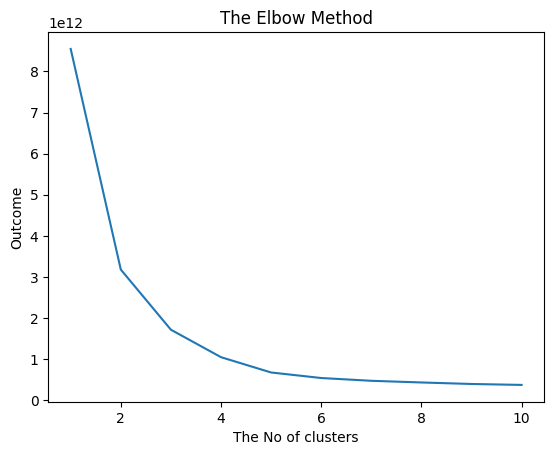

In [5]:
#Visualization of clusters using elbow’s method

plt.plot(range(1,11),my_val)

plt.xlabel('The No of clusters')

plt.ylabel('Outcome')

plt.title('The Elbow Method')

plt.show()

In [6]:
#clustering_kmeans = KMeans(n_clusters=2, init='k-means++')
clustering_kmeans = SpectralClustering(n_clusters=2)
cleaned_data['clusters'] = clustering_kmeans.fit_predict(cleaned_data)

cleaned_data['data_index'] = cleaned_data.index.values
#cluster_map['cluster'] = km.labels_

print(clustering_kmeans.labels_)

"""
kmeans = KMeans(n_clusters = 3, init='k-means++')

kmeans.fit(cleaned_data)


#To show centroids of clusters 

kmeans.cluster_centers_



#Prediction of K-Means clustering 

y_kmeans = kmeans.fit_predict(cleaned_data)

y_kmeans
"""

[0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0
 0 1 0 0]


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


"\nkmeans = KMeans(n_clusters = 3, init='k-means++')\n\nkmeans.fit(cleaned_data)\n\n\n#To show centroids of clusters \n\nkmeans.cluster_centers_\n\n\n\n#Prediction of K-Means clustering \n\ny_kmeans = kmeans.fit_predict(cleaned_data)\n\ny_kmeans\n"

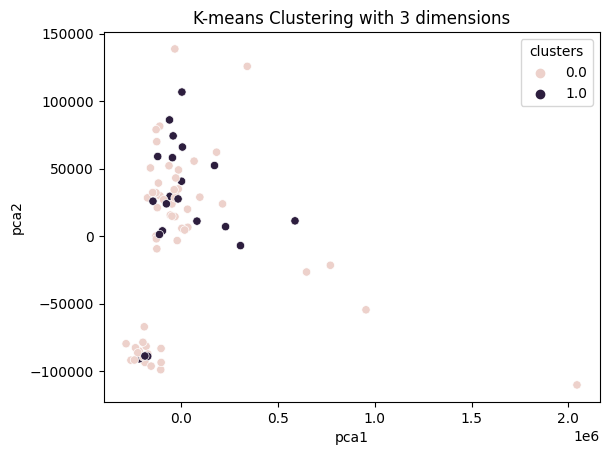

In [7]:
"""
plt.scatter(cleaned_data[y_kmeans == 0,0], X_val[y_kmeans == 0,1], c='red',s=100)

plt.scatter(cleaned_data[y_kmeans == 1,0], X_val[y_kmeans == 1,1], c='green',s=100)

plt.scatter(cleaned_data[y_kmeans == 2,0], X_val[y_kmeans == 2,1], c='orange',s=100)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='brown')

plt.title('K-Means Unsupervised Learning')

plt.show()
"""
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(cleaned_data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=cleaned_data['clusters'], data=results)
plt.title('K-means Clustering with 3 dimensions')
plt.show()

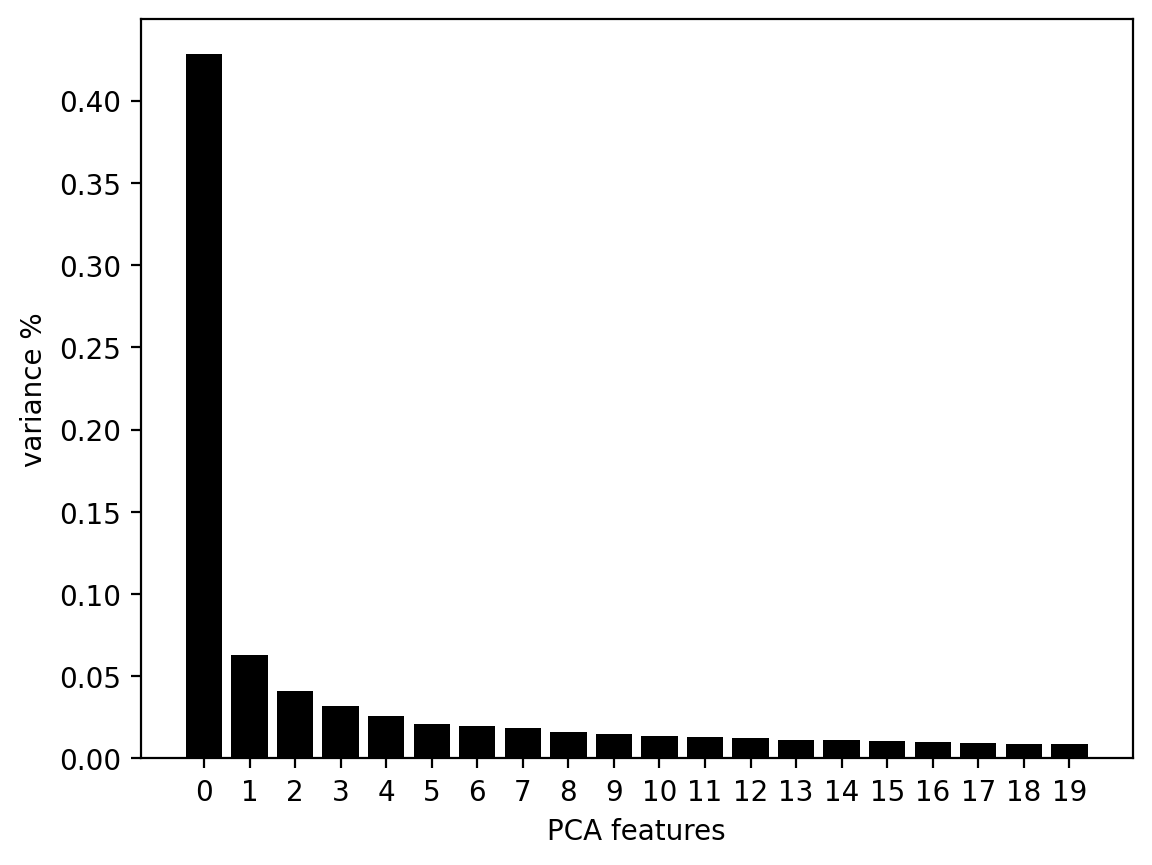

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

#Standardized data
st_data = StandardScaler().fit_transform(cleaned_data)
#st_data = cleaned_data
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(st_data)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

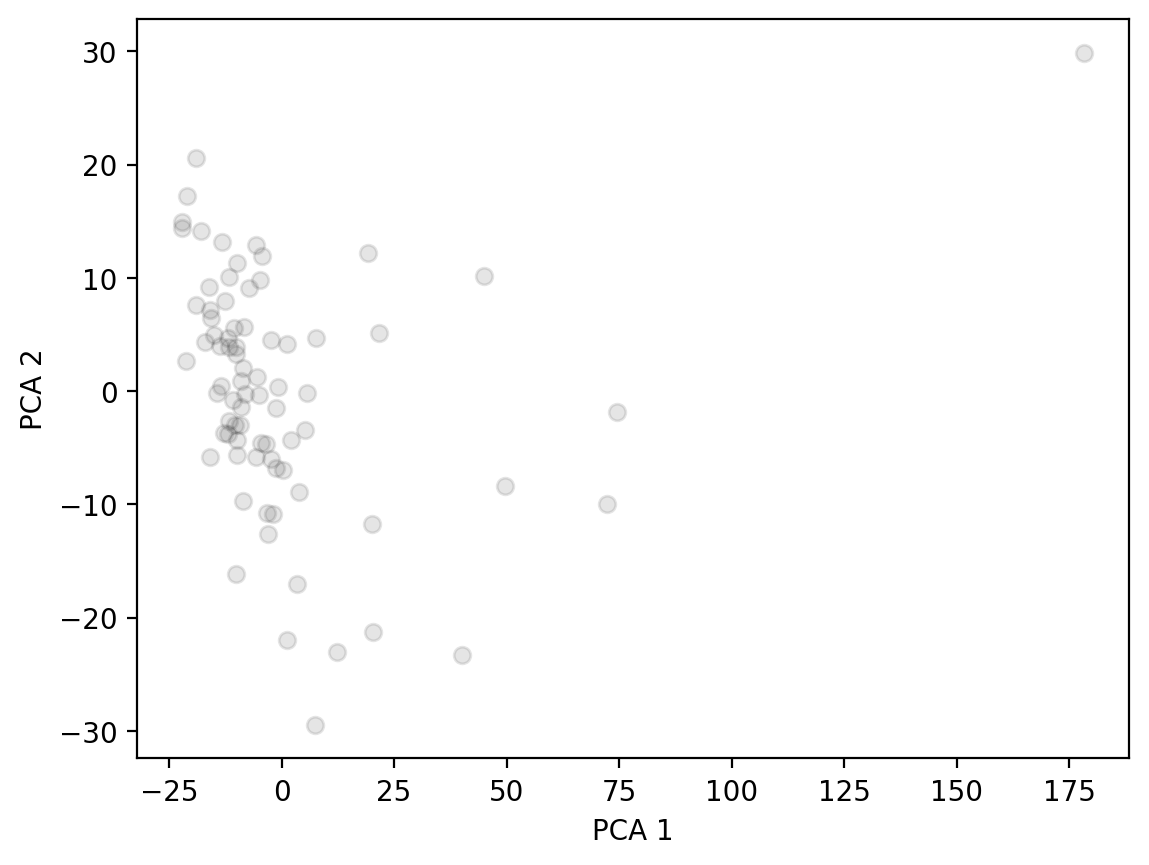

In [9]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [10]:
'''
pca.explained_variance_ratio_

plt.figure(figsize = (10,8))
plt.title('Explained by variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
'''

"\npca.explained_variance_ratio_\n\nplt.figure(figsize = (10,8))\nplt.title('Explained by variance')\nplt.xlabel('Number of components')\nplt.ylabel('Cumulative Explained Variance')\n"

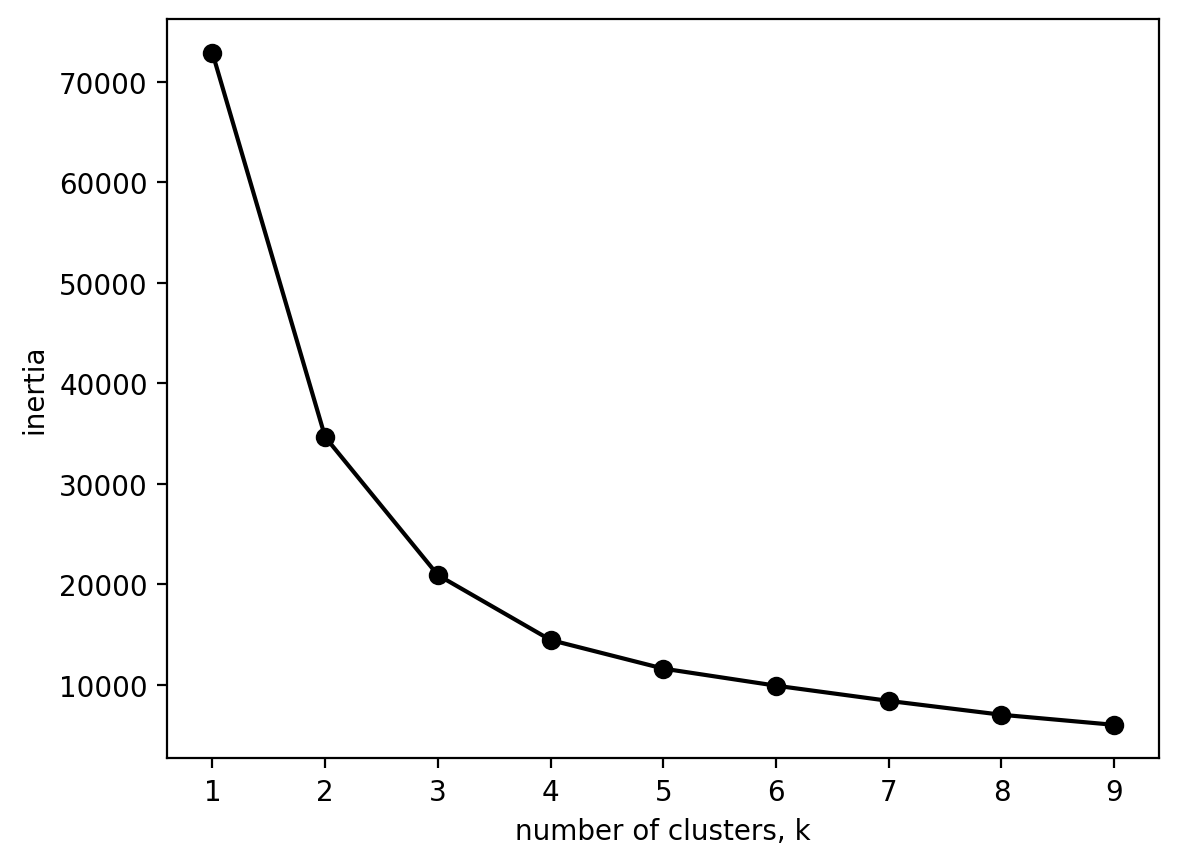

In [11]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()